In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [45]:
# Parameters

a_n = 1
a_e = 2
N_n = 1
N_e = 2
b_nn = 1
b_en = 2
b_ne = .5
b_ee = .5
m_n = .1
m_e = .1
k_n = .1
k_e = .05
sigma = 1
gamma_n = 1
gamma_e = 1
c = 2.25

tau = 10
H = 0.5
delta = .1

In [46]:
def f(x, t):
    f_1 = (a_n * (x[4] - N_n) - b_nn * x[2] - b_en * x[3]) * x[0]
    f_2 = (a_e * (x[4] - N_e) - b_ee * x[3] - b_ne * x[2]) * x[1]

    return (
        f_1 - m_n * x[0],
        f_2 - m_e * x[1],
        m_n * x[0] - k_n * x[2],
        m_e * x[1] - k_e * x[3],
        c - sigma * x[4] + gamma_n * (f_1 + k_n * x[2]) + gamma_e * (f_2 + k_e * x[3])
    )

In [51]:
def flow(f, x_0, t_0, tau, res = 100):
    """ 
        To do. 
    """
    ts = np.linspace(t_0, t_0 + tau, res)
    xs = odeint(f, x_0, ts)
    return (ts, xs)

In [48]:
def kick(X):
    const = -H / (delta * (X[0] + X[1]) + X[2] + X[3])
    kick_vector = np.array([
        const * delta * X[0],
        const * delta * X[1],
        const * X[2],
        const * X[3],
        0
    ])
    return kick_vector

In [ ]:
def flow_and_kick(f, x_0, t_0, tau, T, res = 100):
    """ Returns t,x pair of the flow-kick system.
        tau is the time span between flow kicks
        T is the total simulation timespan. """
    

In [74]:
x_0 = (1,1,1,1,1)
ts, xs = flow(f, x_0, 0, 3)
xs
np.shape(xs)

(100, 5)

In [82]:
def time_plot(ts, xs, variable = 0, directory = None):
    """ 
        variable is the coordinate number of the variable of interest (default to 0)"""
    plt.clf()
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    ax.plot(ts, xs[:,variable]);
    plt.show()
    #if directory != None:
    #    plt.savefig()

In [83]:
def all_time_plot(ts, xs, directory = None):
    """ Plots time series plots for each state variable. """
    plt.clf()
    dim = np.shape(xs)[1] # Dimension of state vector
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    for i in range(dim):
        ax.plot(ts, xs[:,i]);
    plt.show()

In [84]:
def phase_plot(xs, var_1, var_2):
    """ given the values of xs, plots two of the variables 
        against each other (phase portrait) 
        var_1: coordinate of x_axis variable
        var_2: coordinate of y_axis variable """
    plt.clf()
    fig = plt.figure();
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]);
    ax.plot(xs[:, var_1], xs[:, var_2]);
    plt.show()

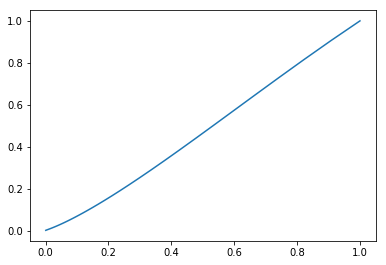

In [86]:
phase_plot(xs, 0, 1)